# Healthcare data EDA

In [234]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime



## Healthcare data from Kaggle:
Data Information: <br>
- **Name**: Column represents patient's name on health record <br>
- **Age**: age of patient at time of admission in years <br>
- **Gender**: patient gender either "Male" or "Female" <br>
- **Blood type**: Patient's bloodtype of the common ones "A+", "O-" etc <br>
- **Medical condition**: primary medical condition or diagnosis associated with patient <br>
- **Date of admission**: date patient was admitted to the facility <br>
- **Doctor**: Name of doctor responsible for care during admission <br>
- **Hospital**: Name of hospital or facility where patient was admitted <br>
- **Insurance provider**: patient's insurance provider <br>
- **Billing amount**: amount of money billed to patient for their healthcare services during admission <br>
- **Room number**: Room number where patient was accomodated during admission <br>
- **Discharge date**: Date patient was discharged from healthcare facility <br>
- **Medication**: Identifies medication prescribed during their admission <br>
- **Test results**: Describes the results of medical tests conducted during patient's admission




In [61]:
# Load English language trained model
nlp = spacy.load("en_core_web_sm")

# Load healthcare data
data = pd.read_csv('healthcare_dataset.csv')

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [63]:
data.shape

(55500, 15)

In [170]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## Exploratory Data Analysis (EDA)

In [66]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


The average number of admissions for a given month is 4625.0


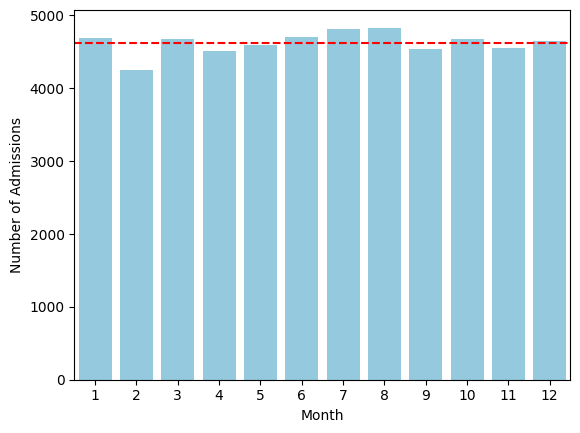

In [233]:
# Hospital admissions per month
admissions_per_month = pd.to_datetime(data['Date of Admission']).dt.month.value_counts().sort_index()
average_admissions= sum(admissions_per_month)/len(admissions_per_month)

# sns.barplot(admissions_per_month, x='Month', y='Number of patients admitted')
sns.barplot(admissions_per_month, color='skyblue')
plt.axhline(y=average_admissions, color='r', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

print(f'The average number of admissions for a given month is {average_admissions}')

In [160]:
# Length of stay
d1 = pd.to_datetime(data['Date of Admission'])
d2 = pd.to_datetime(data['Discharge Date'])

length_of_stay = (d2-d1)

print(f'Average length of stay: {length_of_stay.mean().days} days')
print(f'Maximum length of stay: {length_of_stay.max().days} days')
print(f'Minimum length of stay: {length_of_stay.min().days} day')

Average length of stay: 15 days
Maximum length of stay: 30 days
Minimum length of stay: 1 day


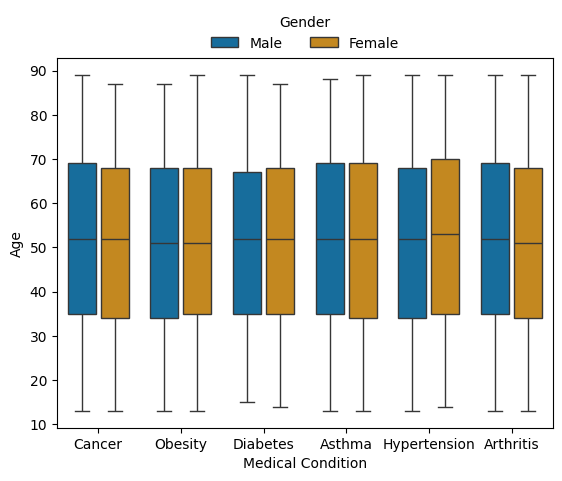

In [202]:
# Relationship between age and medical condition and gender
ax=sns.boxplot(data=data, x='Medical Condition', y='Age', hue='Gender', gap=0.15, palette='colorblind')
sns.move_legend(ax,"upper center", bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=2)


In [217]:
# Relationship between gender and test results
result = data['Test Results']
# sns.barplot(data=data, x=result, y='Gender', gap=0.15, palette='colorblind')
# sns.move_legend(ax,"upper center", bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=2)
result

0              Normal
1        Inconclusive
2              Normal
3            Abnormal
4            Abnormal
             ...     
55495        Abnormal
55496          Normal
55497        Abnormal
55498        Abnormal
55499        Abnormal
Name: Test Results, Length: 55500, dtype: object

Test Results by Medical Condition:
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


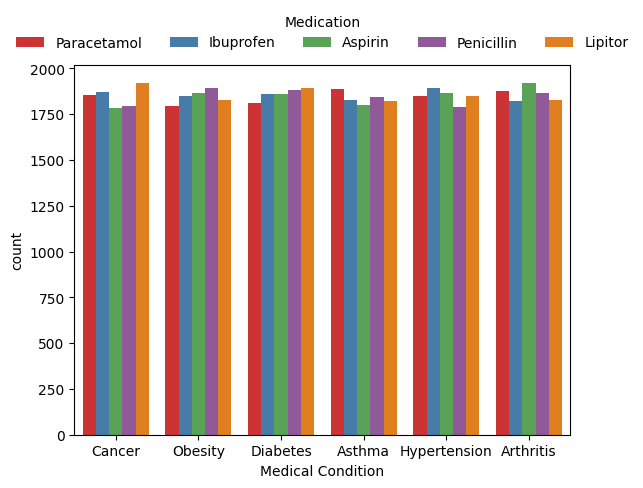

In [229]:
# Test results for each medical condition
condition_vs_test = data.groupby('Medical Condition')['Test Results'].value_counts().unstack()
print("Test Results by Medical Condition:")
print(condition_vs_test)

# Visualise medication prescribed to the medical condition
plot=sns.countplot(data=data, x='Medical Condition', hue='Medication', palette='Set1')
sns.move_legend(plot,"upper center", bbox_to_anchor=(0.5, 1.17), frameon=False, ncol=5)


## Key Observations:
- The data does not contain missing values that need to be handled. <br>
- The data shows little variation in hospital admission numbers per month with the average being 4625 <br>
- There is a large age range for each medical condition with the median, lower and upper quartile ranges for being quite similar for each condition. <br>
- All medications are used to treat each medical condition.

In [231]:
data['Billing Amount']

0        18856.281306
1        33643.327287
2        27955.096079
3        37909.782410
4        14238.317814
             ...     
55495     2650.714952
55496    31457.797307
55497    27620.764717
55498    32451.092358
55499     4010.134172
Name: Billing Amount, Length: 55500, dtype: float64

In [ ]:
# test results vs. disease

# Research Question: 
Can we identify distinct patient groups based on their billing amounts, and do certain medical conditions lead to higher treatment costs than others? <br>
<br>
This could help hospital administrators optimise pricing strategies and resource allocation and nform policy makers about which are the most costly disease to treat.

## Perform K-Means Clustering and determine k

Can we predict the length of stay? - random forest, XGBoost, Linear reg <br>
Eval metrics

Classification problem 